In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import pca_decomposition
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras as kr
from tqdm.keras import TqdmCallback

In [2]:
spill_df = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil_Spill\Data\oil_spill.csv')

In [3]:
spill_df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


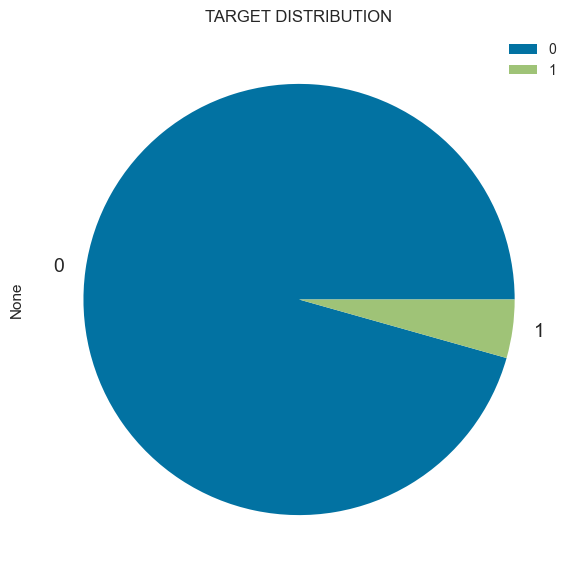

In [4]:
spill_df.groupby(['target']).size().plot(kind='pie', title='TARGET DISTRIBUTION', fontsize=14, legend=True, figsize=(7,7));

In [5]:
spill_df.drop(columns=['f_23', 'f_11', 'f_13', 'f_14', 'f_15', 'f_16', 'f_18', 'f_20', 'f_21', 'f_24', 'f_25', 'f_29', 'f_30', 'f_32', 'f_34', 'f_35', 'f_36', 'f_38', 'f_39', 'f_40', 'f_42',
 'f_43', 'f_44', 'f_48', 'f_49', 'f_6', 'f_9', 'f_10', 'f_26'], inplace=True)

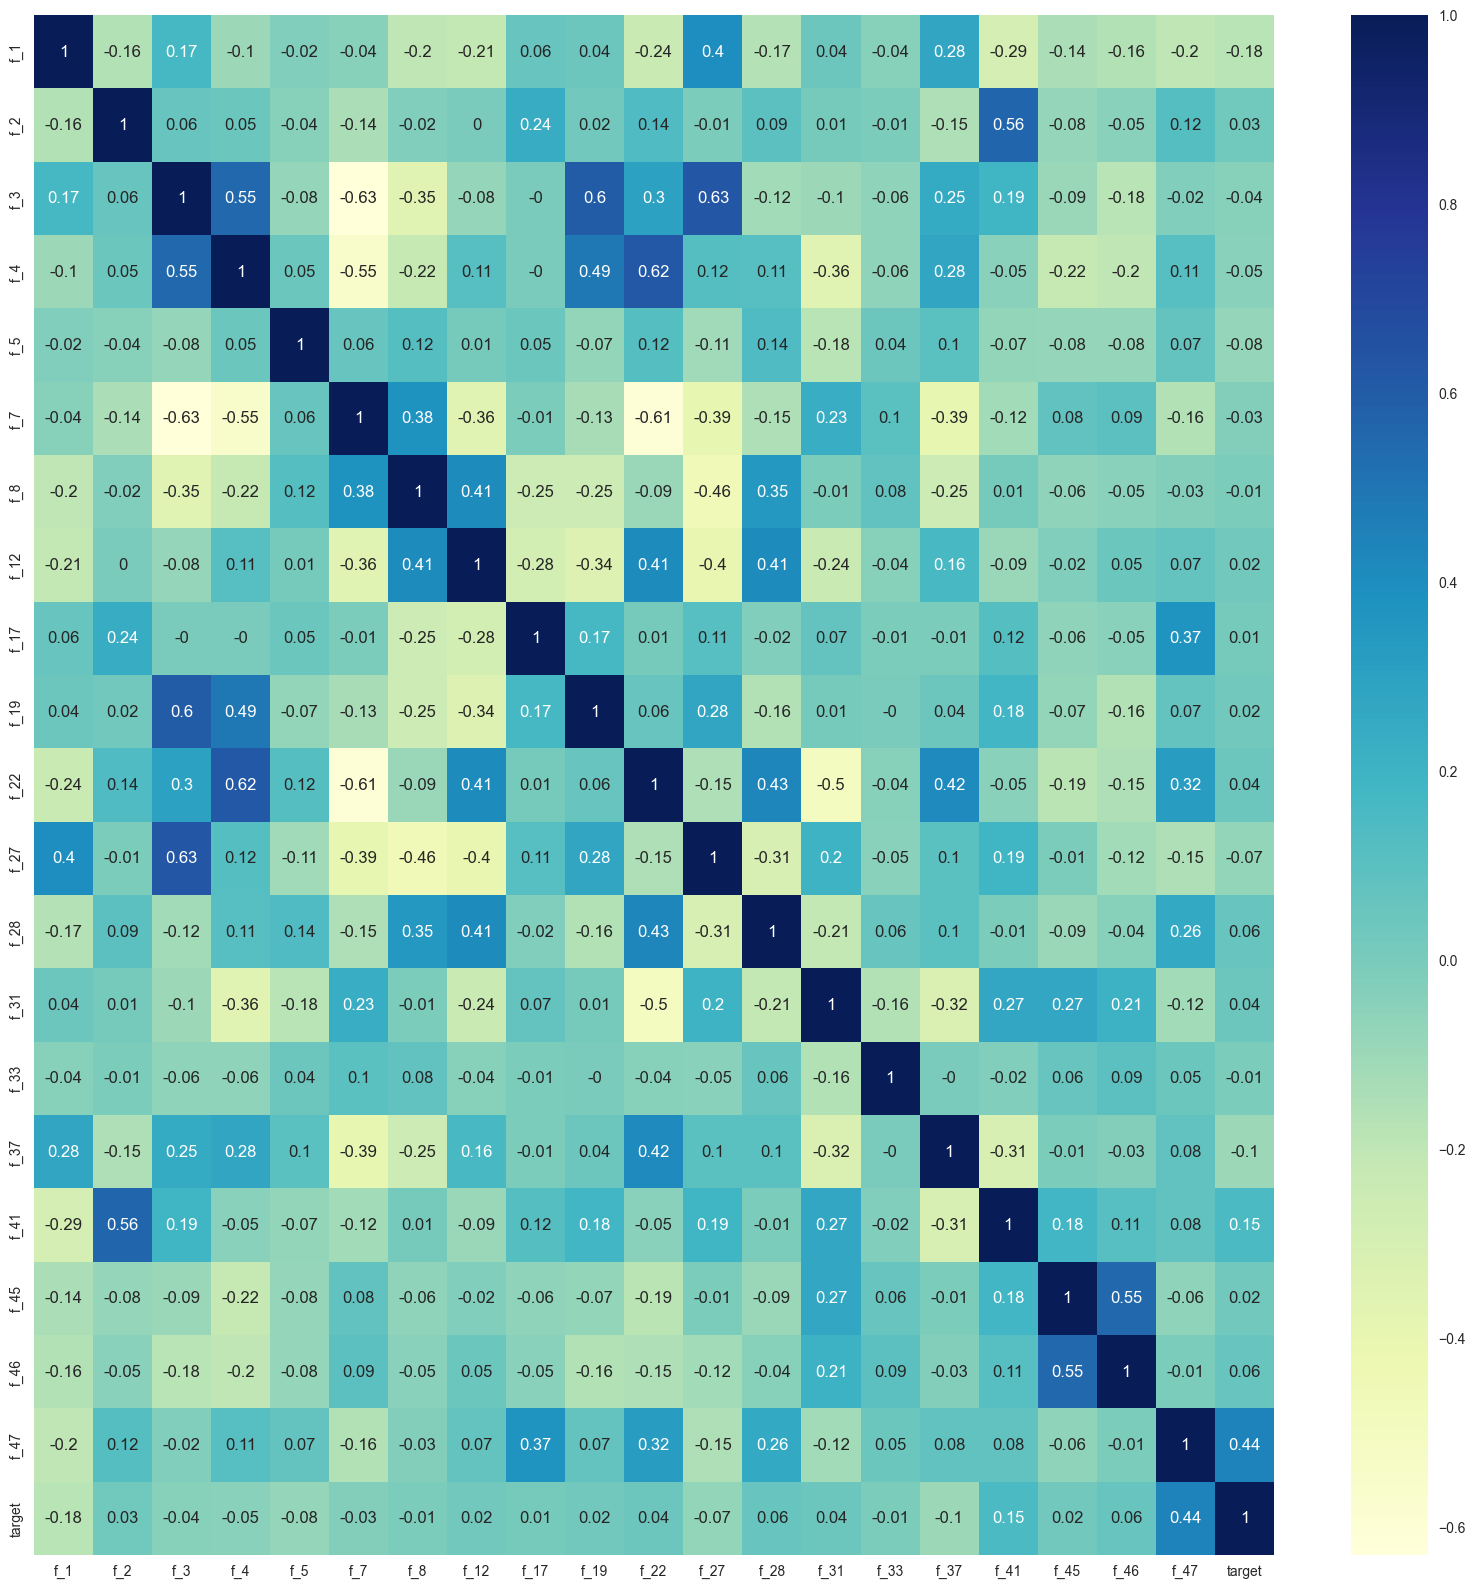

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(round(spill_df.corr(),2), annot=True, cmap='YlGnBu');

In [7]:
oil_spill = spill_df.copy()

In [8]:
oil_spill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_7     937 non-null    float64
 6   f_8     937 non-null    float64
 7   f_12    937 non-null    float64
 8   f_17    937 non-null    float64
 9   f_19    937 non-null    float64
 10  f_22    937 non-null    float64
 11  f_27    937 non-null    float64
 12  f_28    937 non-null    float64
 13  f_31    937 non-null    float64
 14  f_33    937 non-null    float64
 15  f_37    937 non-null    float64
 16  f_41    937 non-null    float64
 17  f_45    937 non-null    float64
 18  f_46    937 non-null    int64  
 19  f_47    937 non-null    float64
 20  target  937 non-null    int64  
dtypes: float64(16), int64(5)
memory usage: 

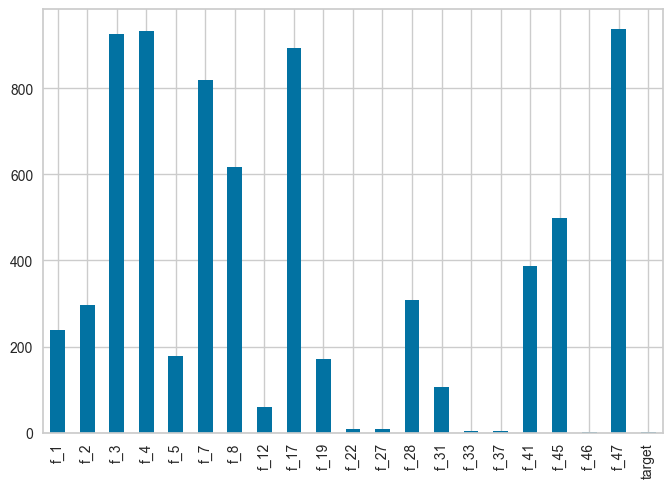

In [9]:
oil_spill.nunique().plot(kind='bar');

In [10]:
oil_spill.groupby('f_22').size()

f_22
47.66      79
55.85     204
67.87     103
69.09      85
75.26     184
85.22     135
87.65      11
123.47     74
126.08     62
dtype: int64

In [11]:
oil_spill[['f_22', 'f_27', 'f_33', 'f_37', 'f_46']] = oil_spill[['f_22', 'f_27', 'f_33', 'f_37', 'f_46']].astype('category')

In [12]:
oil_spill['f_12'].nunique()

59

In [13]:
(oil_spill.isnull()).groupby('f_1').size()

f_1
False    937
dtype: int64

In [14]:
def encode_categ(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes

In [15]:
encode_categ(oil_spill)

In [16]:
oil_spill.isna().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_7       0
f_8       0
f_12      0
f_17      0
f_19      0
f_22      0
f_27      0
f_28      0
f_31      0
f_33      0
f_37      0
f_41      0
f_45      0
f_46      0
f_47      0
target    0
dtype: int64

In [17]:
oil_spill.corr().style.background_gradient(cmap='coolwarm')

,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_12,f_17,f_19,f_22,f_27,f_28,f_31,f_33,f_37,f_41,f_45,f_46,f_47,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.037412,-0.204983,-0.209190,0.056430,0.038746,-0.227025,0.458053,-0.173291,0.035824,-0.037442,0.281274,-0.286190,-0.139478,-0.163693,-0.202983,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,-0.136761,-0.016822,0.004035,0.237388,0.022253,0.133454,-0.080218,0.091962,0.005472,-0.010178,-0.148739,0.555154,-0.080879,-0.048315,0.118792,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,-0.627934,-0.349541,-0.081738,-0.003753,0.599107,0.432742,0.414244,-0.119572,-0.097925,-0.066889,0.246582,0.186920,-0.088310,-0.182458,-0.022098,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,-0.546205,-0.222063,0.106767,-0.000815,0.494286,0.678361,-0.139140,0.113152,-0.358789,-0.067581,0.284814,-0.046934,-0.220461,-0.204776,0.106758,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,0.059128,0.123814,0.009470,0.045836,-0.065304,0.107335,-0.171784,0.138419,-0.175452,0.069531,0.100720,-0.066930,-0.076695,-0.080136,0.070070,-0.078598
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,1.000000,0.381206,-0.363593,-0.008360,-0.134812,-0.570275,-0.057769,-0.145690,0.228706,0.098318,-0.386837,-0.115014,0.077207,0.088633,-0.157243,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,0.381206,1.000000,0.406409,-0.245330,-0.254853,-0.145946,-0.363490,0.349434,-0.013229,0.083467,-0.250518,0.013476,-0.061639,-0.051879,-0.028117,-0.014434
f_12,-0.209190,0.004035,-0.081738,0.106767,0.009470,-0.363593,0.406409,1.000000,-0.283137,-0.340404,0.275982,-0.512491,0.410256,-0.242685,-0.038969,0.164881,-0.088211,-0.018188,0.045217,0.073414,0.018417
f_17,0.056430,0.237388,-0.003753,-0.000815,0.045836,-0.008360,-0.245330,-0.283137,1.000000,0.168030,0.051302,0.066852,-0.020786,0.070026,-0.006327,-0.005505,0.119187,-0.055731,-0.054833,0.368569,0.014977
f_19,0.038746,0.022253,0.599107,0.494286,-0.065304,-0.134812,-0.254853,-0.340404,0.168030,1.000000,0.255632,0.233788,-0.158049,0.010953,-0.012144,0.039504,0.181168,-0.073405,-0.156083,0.074076,0.022329


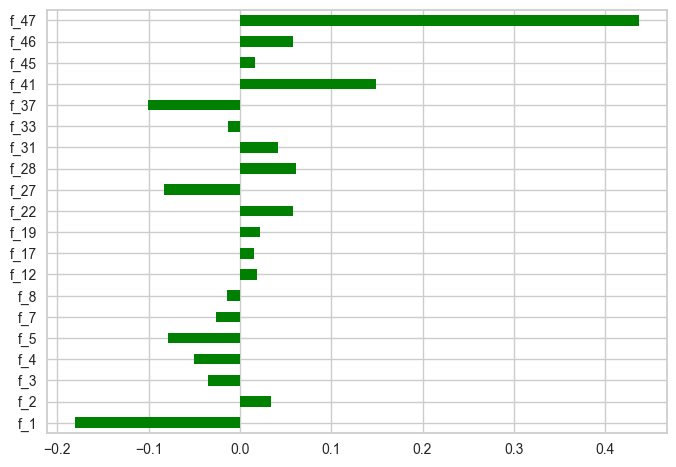

In [18]:
oil_spill.corr()['target'].drop('target', axis=0).plot(kind='barh', color='green');

In [20]:
X = oil_spill.drop('target', axis=1)
Y = oil_spill.target

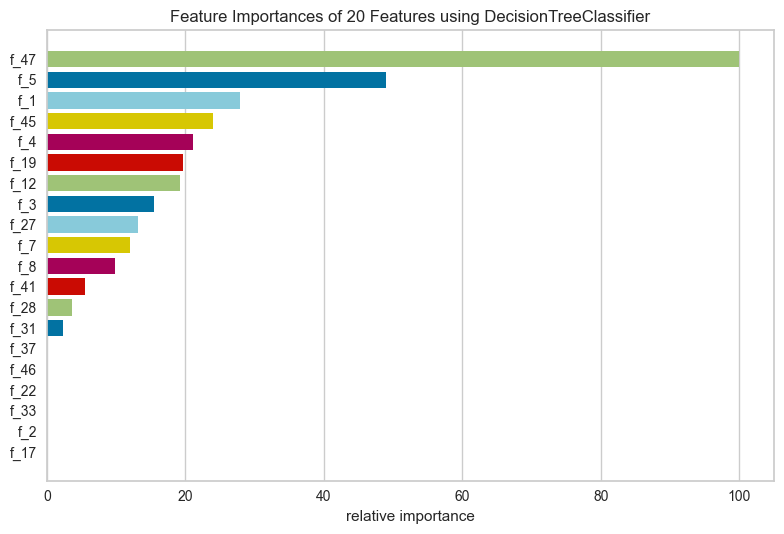

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 20 Features using DecisionTreeClassifier'}, xlabel='relative importance'>,
                   estimator=DecisionTreeClassifier())

In [21]:
feature_importances(DecisionTreeClassifier(), X, Y)

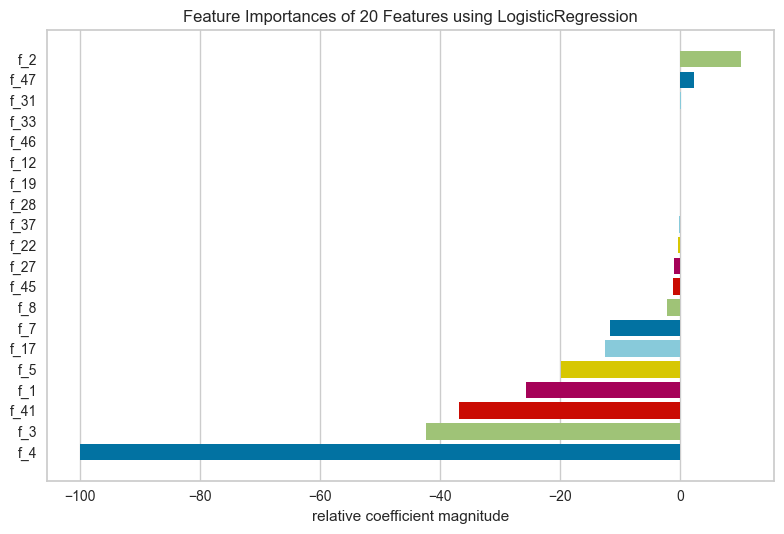

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 20 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(l1_ratio=0.5,
                                                penalty='elasticnet',
                                                solver='saga'))

In [26]:
import warnings
warnings.filterwarnings("ignore")
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, Y, stack=False)

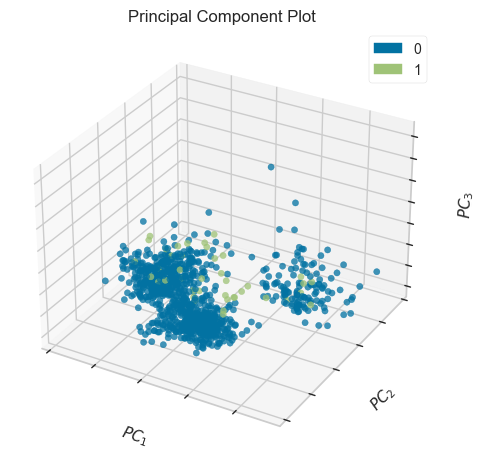

In [28]:
pca_decomposition(X,Y, projection=3);

### Oversampling

In [42]:
Y.value_counts()[0], Y.count()

(896, 937)

In [43]:
X, Y = make_classification(n_classes=2, class_sep=2, weights=[Y.value_counts()[0]/Y.count(), Y.value_counts()[1]/Y.count()], n_samples=Y.count())

In [52]:
Counter(Y)

Counter({0: 894, 1: 43})

In [54]:
oversam_spill = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversam_spill.fit_resample(X,Y)
Counter(Y_over)

Counter({0: 894, 1: 894})

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size=0.2, random_state=82, stratify=Y_over)

In [68]:
X_train.shape

(1430, 20)

In [74]:
X_test.shape

(358, 20)

### Random Forest

In [75]:
os_rf_mod = RandomForestClassifier().fit(X_train, Y_train) 

In [77]:
os_rf_pred = os_rf_mod.predict(X_test)

In [82]:
precision_score(Y_test, os_rf_pred), f1_score(Y_test, os_rf_pred), mean_squared_error(Y_test, os_rf_pred)  

(0.9944444444444445, 0.9972144846796658, 0.002793296089385475)

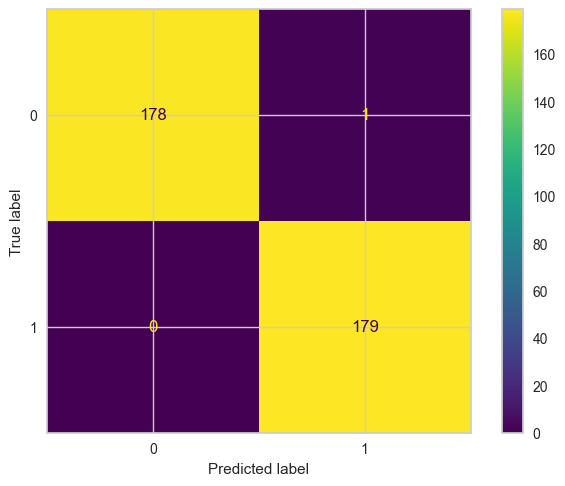

In [87]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, os_rf_pred)).plot();

### Neural Networks

In [106]:
# Model parameteres

in_shape = X.shape[1]
out_shape = 1
nodes = np.ceil(2*in_shape/(3 + out_shape)).astype(int)
batch_size = np.ceil(len(X)/8).astype(int)
epochs = 50

es = kr.callbacks.EarlyStopping(monitor='loss', patience=5)

In [108]:
# Neural network arquitecture
spill_m = kr.models.Sequential(name='OilSpillPred')
spill_m.add(kr.layers.Dense(batch_size, input_shape = (in_shape,), activation='relu'))
spill_m.add(kr.layers.BatchNormalization())
spill_m.add(kr.layers.Dense(nodes, activation='relu'))
spill_m.add(kr.layers.Dropout(0.2))
spill_m.add(kr.layers.Dense(nodes, activation='relu'))
spill_m.add(kr.layers.Dense(out_shape, activation='sigmoid'))


In [114]:
# Model compile
spill_m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision'])

In [115]:
spill_m.summary()

Model: "OilSpillPred"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 118)               2478      
                                                                 
 batch_normalization (BatchN  (None, 118)              472       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 10)                1190      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                      

In [116]:
# Fit to data

spill_m_f = spill_m.fit(X,Y,batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[TqdmCallback(verbose=0),es], validation_split=0.05)

0epoch [00:00, ?epoch/s]

In [156]:
nn_preds = spill_m.predict(X_test)


In [157]:
spill_preds = [round(x[0]) for x in nn_preds]
spill_preds[:20]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]

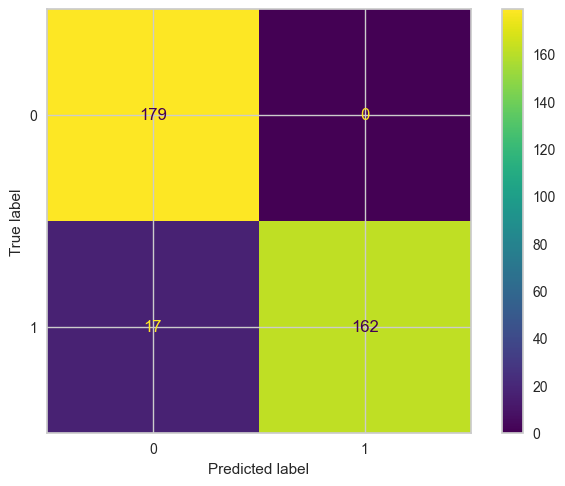

In [158]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, spill_preds)).plot();